# Content

<ul>
    <li> Dataframes </li>
    <li> Graphs </li>
</ul>

## Indroduction

In [1]:
import seaborn as sns
import math
import matplotlib.pyplot as plt
import pandas as pd

This notebook goes through the Van der pol oscillator model. It illustrates the data within the simulations, and compares the simulations with the predictions within the neurla network

## Dataframes

This would allow us to see the simulations of data which is saved in a csv

In [2]:
lorenz_df = pd.DataFrame(data = pd.read_csv("../../data/train/lorenz.csv"))
lorenz_df

time         x         y          z  initial_x  initial_y  initial_z
0        0.00  1.000000  1.000000   1.000000          1          1          1
1        0.01  1.012566  1.259920   0.984891          1          1          1
2        0.02  1.048821  1.524001   0.973114          1          1          1
3        0.03  1.107206  1.798315   0.965159          1          1          1
4        0.04  1.186865  2.088546   0.961737          1          1          1
...       ...       ...       ...        ...        ...        ...        ...
320635  50.05 -2.743257 -3.393439  18.411442          4          4          4
320636  50.06 -2.816460 -3.630213  18.023244          4          4          4
320637  50.07 -2.906007 -3.883324  17.654996          4          4          4
320638  50.08 -3.011973 -4.154336  17.307714          4          4          4
320639  50.09 -3.134577 -4.444896  16.982616          4          4          4

[320640 rows x 7 columns]

This combines the initial x and initial y columns together. This would come in useful when plotting the graphs

In [3]:
lorenz_df['initial_x,initial_y,initial_z'] = list(zip(lorenz_df.initial_x, lorenz_df.initial_y, lorenz_df.initial_z))
lorenz_df

time         x         y          z  initial_x  initial_y  initial_z  \
0        0.00  1.000000  1.000000   1.000000          1          1          1   
1        0.01  1.012566  1.259920   0.984891          1          1          1   
2        0.02  1.048821  1.524001   0.973114          1          1          1   
3        0.03  1.107206  1.798315   0.965159          1          1          1   
4        0.04  1.186865  2.088546   0.961737          1          1          1   
...       ...       ...       ...        ...        ...        ...        ...   
320635  50.05 -2.743257 -3.393439  18.411442          4          4          4   
320636  50.06 -2.816460 -3.630213  18.023244          4          4          4   
320637  50.07 -2.906007 -3.883324  17.654996          4          4          4   
320638  50.08 -3.011973 -4.154336  17.307714          4          4          4   
320639  50.09 -3.134577 -4.444896  16.982616          4          4          4   

       initial_x,initial_y,initial_z  
0                          (1, 1, 1)  
1                          (1, 1, 1)  
2                          (1, 1, 1)  
3                          (1, 1, 1)  
4                          (1, 1, 1)  
...                              ...  
320635                     (4, 4, 4)  
320636                     (4, 4, 4)  
320637                     (4, 4, 4)  
320638                     (4, 4, 4)  
320639                     (4, 4, 4)  

[320640 rows x 8 columns]

This would produce all the initial x1,y1 values.

In [4]:
lorenz_df_x1y1 = lorenz_df[lorenz_df['initial_x,initial_y,initial_z'] == (1,1,1)]
lorenz_df_x1y1

time         x         y          z  initial_x  initial_y  initial_z  \
0      0.00  1.000000  1.000000   1.000000          1          1          1   
1      0.01  1.012566  1.259920   0.984891          1          1          1   
2      0.02  1.048821  1.524001   0.973114          1          1          1   
3      0.03  1.107206  1.798315   0.965159          1          1          1   
4      0.04  1.186865  2.088546   0.961737          1          1          1   
...     ...       ...       ...        ...        ...        ...        ...   
5005  50.05  3.024841  5.055734  13.391929          1          1          1   
5006  50.06  3.237565  5.463418  13.201996          1          1          1   
5007  50.07  3.470484  5.905465  13.042683          1          1          1   
5008  50.08  3.725065  6.384284  12.917579          1          1          1   
5009  50.09  4.002857  6.902187  12.830906          1          1          1   

     initial_x,initial_y,initial_z  
0                        (1, 1, 1)  
1                        (1, 1, 1)  
2                        (1, 1, 1)  
3                        (1, 1, 1)  
4                        (1, 1, 1)  
...                            ...  
5005                     (1, 1, 1)  
5006                     (1, 1, 1)  
5007                     (1, 1, 1)  
5008                     (1, 1, 1)  
5009                     (1, 1, 1)  

[5010 rows x 8 columns]

This is for the predictions made by the neural network

In [5]:
lorenz_df_preds = pd.DataFrame(data = pd.read_csv("../../data/preds/train/lorenz.csv"))
lorenz_df_preds

time  initial_x  initial_y  initial_z         x         y         z
0       0.00          1          1          1  0.013977 -0.033105 -0.028625
1       0.01          1          1          1  0.013976 -0.032954 -0.028535
2       0.02          1          1          1  0.013976 -0.032803 -0.028444
3       0.03          1          1          1  0.013976 -0.032661 -0.028356
4       0.04          1          1          1  0.013975 -0.032520 -0.028276
...      ...        ...        ...        ...       ...       ...       ...
40075  50.05          2          2          2  0.019268  0.243832 -1.262566
40076  50.06          2          2          2  0.019274  0.243879 -1.262814
40077  50.07          2          2          2  0.019279  0.243926 -1.263061
40078  50.08          2          2          2  0.019285  0.243973 -1.263308
40079  50.09          2          2          2  0.019291  0.244020 -1.263555

[40080 rows x 7 columns]

This would create an additional columns which combines initial_x and initial_y

In [6]:
lorenz_df_preds['initial_x,initial_y,initial_z'] = list(zip(lorenz_df_preds.initial_x, lorenz_df_preds.initial_y, lorenz_df_preds.initial_z))
lorenz_df_preds

time  initial_x  initial_y  initial_z         x         y         z  \
0       0.00          1          1          1  0.013977 -0.033105 -0.028625   
1       0.01          1          1          1  0.013976 -0.032954 -0.028535   
2       0.02          1          1          1  0.013976 -0.032803 -0.028444   
3       0.03          1          1          1  0.013976 -0.032661 -0.028356   
4       0.04          1          1          1  0.013975 -0.032520 -0.028276   
...      ...        ...        ...        ...       ...       ...       ...   
40075  50.05          2          2          2  0.019268  0.243832 -1.262566   
40076  50.06          2          2          2  0.019274  0.243879 -1.262814   
40077  50.07          2          2          2  0.019279  0.243926 -1.263061   
40078  50.08          2          2          2  0.019285  0.243973 -1.263308   
40079  50.09          2          2          2  0.019291  0.244020 -1.263555   

      initial_x,initial_y,initial_z  
0                         (1, 1, 1)  
1                         (1, 1, 1)  
2                         (1, 1, 1)  
3                         (1, 1, 1)  
4                         (1, 1, 1)  
...                             ...  
40075                     (2, 2, 2)  
40076                     (2, 2, 2)  
40077                     (2, 2, 2)  
40078                     (2, 2, 2)  
40079                     (2, 2, 2)  

[40080 rows x 8 columns]

This would only list a row where initial_x, initial_y and initial_z all equal 1

In [7]:
lorenz_df_preds_x1y1 = lorenz_df_preds[lorenz_df_preds['initial_x,initial_y,initial_z'] == (1,1,1)]
lorenz_df_preds_x1y1

time  initial_x  initial_y  initial_z         x         y         z  \
0      0.00          1          1          1  0.013977 -0.033105 -0.028625   
1      0.01          1          1          1  0.013976 -0.032954 -0.028535   
2      0.02          1          1          1  0.013976 -0.032803 -0.028444   
3      0.03          1          1          1  0.013976 -0.032661 -0.028356   
4      0.04          1          1          1  0.013975 -0.032520 -0.028276   
...     ...        ...        ...        ...       ...       ...       ...   
5005  50.05          1          1          1  0.033990  0.233842 -1.234155   
5006  50.06          1          1          1  0.033995  0.233890 -1.234403   
5007  50.07          1          1          1  0.034001  0.233939 -1.234651   
5008  50.08          1          1          1  0.034006  0.233987 -1.234899   
5009  50.09          1          1          1  0.034011  0.234036 -1.235146   

     initial_x,initial_y,initial_z  
0                        (1, 1, 1)  
1                        (1, 1, 1)  
2                        (1, 1, 1)  
3                        (1, 1, 1)  
4                        (1, 1, 1)  
...                            ...  
5005                     (1, 1, 1)  
5006                     (1, 1, 1)  
5007                     (1, 1, 1)  
5008                     (1, 1, 1)  
5009                     (1, 1, 1)  

[5010 rows x 8 columns]

we want to merge columns initial_x and initial_y together

In [8]:
lorenz_df_preds_rename = lorenz_df_preds.rename(columns={'initial_x' : 'initial_preds_x', 
                                            'initial_y': 'initial_preds_y',
                                            'initial_z': 'initial_preds_z', 
                                            'initial_x,initial_y,initial_z' : 'preds_initial_x,initial_y,initial_z',
                                            'x' : 'x_preds',
                                            'y' : 'y_preds',
                                            'z' : 'z_preds',
                                            'time': 't'})
lorenz_df_preds_rename

t  initial_preds_x  initial_preds_y  initial_preds_z   x_preds  \
0       0.00                1                1                1  0.013977   
1       0.01                1                1                1  0.013976   
2       0.02                1                1                1  0.013976   
3       0.03                1                1                1  0.013976   
4       0.04                1                1                1  0.013975   
...      ...              ...              ...              ...       ...   
40075  50.05                2                2                2  0.019268   
40076  50.06                2                2                2  0.019274   
40077  50.07                2                2                2  0.019279   
40078  50.08                2                2                2  0.019285   
40079  50.09                2                2                2  0.019291   

        y_preds   z_preds preds_initial_x,initial_y,initial_z  
0     -0.033105 -0.028625                           (1, 1, 1)  
1     -0.032954 -0.028535                           (1, 1, 1)  
2     -0.032803 -0.028444                           (1, 1, 1)  
3     -0.032661 -0.028356                           (1, 1, 1)  
4     -0.032520 -0.028276                           (1, 1, 1)  
...         ...       ...                                 ...  
40075  0.243832 -1.262566                           (2, 2, 2)  
40076  0.243879 -1.262814                           (2, 2, 2)  
40077  0.243926 -1.263061                           (2, 2, 2)  
40078  0.243973 -1.263308                           (2, 2, 2)  
40079  0.244020 -1.263555                           (2, 2, 2)  

[40080 rows x 8 columns]

The next line of code merge the prediction dataframe and the simulations dataframe together

In [70]:
lorenz_df_compare = pd.merge(lorenz_df, lorenz_df_preds_rename, right_index=True, left_index=True)
lorenz_df_compare

time         x         y          z  initial_x  initial_y  initial_z  \
0       0.00  1.000000  1.000000   1.000000          1          1          1   
1       0.01  1.012566  1.259920   0.984891          1          1          1   
2       0.02  1.048821  1.524001   0.973114          1          1          1   
3       0.03  1.107206  1.798315   0.965159          1          1          1   
4       0.04  1.186865  2.088546   0.961737          1          1          1   
...      ...       ...       ...        ...        ...        ...        ...   
40075  50.05  1.697367  2.394757  15.806383          1          2          4   
40076  50.06  1.772806  2.584607  15.433057          1          2          4   
40077  50.07  1.859832  2.789183  15.075084          1          2          4   
40078  50.08  1.958824  3.010166  14.733004          1          2          4   
40079  50.09  2.070291  3.249350  14.407509          1          2          4   

      initial_x,initial_y,initial_z      t  initial_preds_x  initial_preds_y  \
0                         (1, 1, 1)   0.00                1                1   
1                         (1, 1, 1)   0.01                1                1   
2                         (1, 1, 1)   0.02                1                1   
3                         (1, 1, 1)   0.03                1                1   
4                         (1, 1, 1)   0.04                1                1   
...                             ...    ...              ...              ...   
40075                     (1, 2, 4)  50.05                2                2   
40076                     (1, 2, 4)  50.06                2                2   
40077                     (1, 2, 4)  50.07                2                2   
40078                     (1, 2, 4)  50.08                2                2   
40079                     (1, 2, 4)  50.09                2                2   

       initial_preds_z   x_preds   y_preds   z_preds  \
0                    1  0.013977 -0.033105 -0.028625   
1                    1  0.013976 -0.032954 -0.028535   
2                    1  0.013976 -0.032803 -0.028444   
3                    1  0.013976 -0.032661 -0.028356   
4                    1  0.013975 -0.032520 -0.028276   
...                ...       ...       ...       ...   
40075                2  0.019268  0.243832 -1.262566   
40076                2  0.019274  0.243879 -1.262814   
40077                2  0.019279  0.243926 -1.263061   
40078                2  0.019285  0.243973 -1.263308   
40079                2  0.019291  0.244020 -1.263555   

      preds_initial_x,initial_y,initial_z  
0                               (1, 1, 1)  
1                               (1, 1, 1)  
2                               (1, 1, 1)  
3                               (1, 1, 1)  
4                               (1, 1, 1)  
...                                   ...  
40075                           (2, 2, 2)  
40076                           (2, 2, 2)  
40077                           (2, 2, 2)  
40078                           (2, 2, 2)  
40079                           (2, 2, 2)  

[40080 rows x 16 columns]

The next line of code will remove some redundant from the merged dataframe

In [71]:
lorenz_df_compare = lorenz_df_compare.drop(columns=["initial_z", "initial_y", "initial_x","initial_preds_x", "initial_preds_y", "initial_preds_z", "preds_initial_x,initial_y,initial_z", "t"])
lorenz_df_compare 

time         x         y          z initial_x,initial_y,initial_z  \
0       0.00  1.000000  1.000000   1.000000                     (1, 1, 1)   
1       0.01  1.012566  1.259920   0.984891                     (1, 1, 1)   
2       0.02  1.048821  1.524001   0.973114                     (1, 1, 1)   
3       0.03  1.107206  1.798315   0.965159                     (1, 1, 1)   
4       0.04  1.186865  2.088546   0.961737                     (1, 1, 1)   
...      ...       ...       ...        ...                           ...   
40075  50.05  1.697367  2.394757  15.806383                     (1, 2, 4)   
40076  50.06  1.772806  2.584607  15.433057                     (1, 2, 4)   
40077  50.07  1.859832  2.789183  15.075084                     (1, 2, 4)   
40078  50.08  1.958824  3.010166  14.733004                     (1, 2, 4)   
40079  50.09  2.070291  3.249350  14.407509                     (1, 2, 4)   

        x_preds   y_preds   z_preds  
0      0.013977 -0.033105 -0.028625  
1      0.013976 -0.032954 -0.028535  
2      0.013976 -0.032803 -0.028444  
3      0.013976 -0.032661 -0.028356  
4      0.013975 -0.032520 -0.028276  
...         ...       ...       ...  
40075  0.019268  0.243832 -1.262566  
40076  0.019274  0.243879 -1.262814  
40077  0.019279  0.243926 -1.263061  
40078  0.019285  0.243973 -1.263308  
40079  0.019291  0.244020 -1.263555  

[40080 rows x 8 columns]

In [72]:
lorenz_df_compare_melt = lorenz_df_compare.melt(["time", "initial_x,initial_y,initial_z", "x", "x_preds", "z", "z_preds"], var_name='y', value_name='yvals')
lorenz_df_compare_melt

time initial_x,initial_y,initial_z         x   x_preds          z  \
0       0.00                     (1, 1, 1)  1.000000  0.013977   1.000000   
1       0.01                     (1, 1, 1)  1.012566  0.013976   0.984891   
2       0.02                     (1, 1, 1)  1.048821  0.013976   0.973114   
3       0.03                     (1, 1, 1)  1.107206  0.013976   0.965159   
4       0.04                     (1, 1, 1)  1.186865  0.013975   0.961737   
...      ...                           ...       ...       ...        ...   
80155  50.05                     (1, 2, 4)  1.697367  0.019268  15.806383   
80156  50.06                     (1, 2, 4)  1.772806  0.019274  15.433057   
80157  50.07                     (1, 2, 4)  1.859832  0.019279  15.075084   
80158  50.08                     (1, 2, 4)  1.958824  0.019285  14.733004   
80159  50.09                     (1, 2, 4)  2.070291  0.019291  14.407509   

        z_preds        y     yvals  
0     -0.028625        y  1.000000  
1     -0.028535        y  1.259920  
2     -0.028444        y  1.524001  
3     -0.028356        y  1.798315  
4     -0.028276        y  2.088546  
...         ...      ...       ...  
80155 -1.262566  y_preds  0.243832  
80156 -1.262814  y_preds  0.243879  
80157 -1.263061  y_preds  0.243926  
80158 -1.263308  y_preds  0.243973  
80159 -1.263555  y_preds  0.244020  

[80160 rows x 8 columns]

In [73]:
lorenz_df_compare_melt = lorenz_df_compare_melt.melt(["time", "initial_x,initial_y,initial_z", "y", "yvals", "z", "z_preds"], var_name='x', value_name='xvals')
lorenz_df_compare_melt

time initial_x,initial_y,initial_z        y     yvals          z  \
0        0.00                     (1, 1, 1)        y  1.000000   1.000000   
1        0.01                     (1, 1, 1)        y  1.259920   0.984891   
2        0.02                     (1, 1, 1)        y  1.524001   0.973114   
3        0.03                     (1, 1, 1)        y  1.798315   0.965159   
4        0.04                     (1, 1, 1)        y  2.088546   0.961737   
...       ...                           ...      ...       ...        ...   
160315  50.05                     (1, 2, 4)  y_preds  0.243832  15.806383   
160316  50.06                     (1, 2, 4)  y_preds  0.243879  15.433057   
160317  50.07                     (1, 2, 4)  y_preds  0.243926  15.075084   
160318  50.08                     (1, 2, 4)  y_preds  0.243973  14.733004   
160319  50.09                     (1, 2, 4)  y_preds  0.244020  14.407509   

         z_preds        x     xvals  
0      -0.028625        x  1.000000  
1      -0.028535        x  1.012566  
2      -0.028444        x  1.048821  
3      -0.028356        x  1.107206  
4      -0.028276        x  1.186865  
...          ...      ...       ...  
160315 -1.262566  x_preds  0.019268  
160316 -1.262814  x_preds  0.019274  
160317 -1.263061  x_preds  0.019279  
160318 -1.263308  x_preds  0.019285  
160319 -1.263555  x_preds  0.019291  

[160320 rows x 8 columns]

In [74]:
lorenz_df_compare_melt = lorenz_df_compare_melt.melt(["time", "initial_x,initial_y,initial_z", "y", "yvals", "x", "xvals"], var_name='z', value_name='zvals')
lorenz_df_compare_melt

time initial_x,initial_y,initial_z        y     yvals        x  \
0        0.00                     (1, 1, 1)        y  1.000000        x   
1        0.01                     (1, 1, 1)        y  1.259920        x   
2        0.02                     (1, 1, 1)        y  1.524001        x   
3        0.03                     (1, 1, 1)        y  1.798315        x   
4        0.04                     (1, 1, 1)        y  2.088546        x   
...       ...                           ...      ...       ...      ...   
320635  50.05                     (1, 2, 4)  y_preds  0.243832  x_preds   
320636  50.06                     (1, 2, 4)  y_preds  0.243879  x_preds   
320637  50.07                     (1, 2, 4)  y_preds  0.243926  x_preds   
320638  50.08                     (1, 2, 4)  y_preds  0.243973  x_preds   
320639  50.09                     (1, 2, 4)  y_preds  0.244020  x_preds   

           xvals        z     zvals  
0       1.000000        z  1.000000  
1       1.012566        z  0.984891  
2       1.048821        z  0.973114  
3       1.107206        z  0.965159  
4       1.186865        z  0.961737  
...          ...      ...       ...  
320635  0.019268  z_preds -1.262566  
320636  0.019274  z_preds -1.262814  
320637  0.019279  z_preds -1.263061  
320638  0.019285  z_preds -1.263308  
320639  0.019291  z_preds -1.263555  

[320640 rows x 8 columns]

In [47]:
def hue(var):
    """
        Hue: 
            This would be used later for plotting graphs. It returns a categoried columns to identify the
            actual simulations and predictions from the neural network with the variable var
        Args:
            var (<>): This identify which variable you want to categories.
    """
    dict_columns = { "y" : ["y","y_preds"],
                "x" : ["x","x_preds"],
                "z" : ["z","z_preds"], }
    dict_columns.pop(var)
    columns = ["initial_x,initial_y,initial_z","time","initial_x","initial_y","initial_z"]
    for val in dict_columns.values():
        for i in val:
            columns.append(i)
    df = lorenz_df_compare.melt(columns, var_name=var, value_name="{}vals".format(var))
    df = df.reset_index(drop = True)
    return df

In [48]:
hue("x")

initial_x,initial_y,initial_z   time  initial_x  initial_y  initial_z  \
0                         (1, 1, 1)   0.00          1          1          1   
1                         (1, 1, 1)   0.01          1          1          1   
2                         (1, 1, 1)   0.02          1          1          1   
3                         (1, 1, 1)   0.03          1          1          1   
4                         (1, 1, 1)   0.04          1          1          1   
...                             ...    ...        ...        ...        ...   
80155                     (1, 2, 4)  50.05          1          2          4   
80156                     (1, 2, 4)  50.06          1          2          4   
80157                     (1, 2, 4)  50.07          1          2          4   
80158                     (1, 2, 4)  50.08          1          2          4   
80159                     (1, 2, 4)  50.09          1          2          4   

              y   y_preds          z   z_preds        x     xvals  
0      1.000000 -0.033105   1.000000 -0.028625        x  1.000000  
1      1.259920 -0.032954   0.984891 -0.028535        x  1.012566  
2      1.524001 -0.032803   0.973114 -0.028444        x  1.048821  
3      1.798315 -0.032661   0.965159 -0.028356        x  1.107206  
4      2.088546 -0.032520   0.961737 -0.028276        x  1.186865  
...         ...       ...        ...       ...      ...       ...  
80155  2.394757  0.243832  15.806383 -1.262566  x_preds  0.019268  
80156  2.584607  0.243879  15.433057 -1.262814  x_preds  0.019274  
80157  2.789183  0.243926  15.075084 -1.263061  x_preds  0.019279  
80158  3.010166  0.243973  14.733004 -1.263308  x_preds  0.019285  
80159  3.249350  0.244020  14.407509 -1.263555  x_preds  0.019291  

[80160 rows x 11 columns]

In [49]:
hue("y")

initial_x,initial_y,initial_z   time  initial_x  initial_y  initial_z  \
0                         (1, 1, 1)   0.00          1          1          1   
1                         (1, 1, 1)   0.01          1          1          1   
2                         (1, 1, 1)   0.02          1          1          1   
3                         (1, 1, 1)   0.03          1          1          1   
4                         (1, 1, 1)   0.04          1          1          1   
...                             ...    ...        ...        ...        ...   
80155                     (1, 2, 4)  50.05          1          2          4   
80156                     (1, 2, 4)  50.06          1          2          4   
80157                     (1, 2, 4)  50.07          1          2          4   
80158                     (1, 2, 4)  50.08          1          2          4   
80159                     (1, 2, 4)  50.09          1          2          4   

              x   x_preds          z   z_preds        y     yvals  
0      1.000000  0.013977   1.000000 -0.028625        y  1.000000  
1      1.012566  0.013976   0.984891 -0.028535        y  1.259920  
2      1.048821  0.013976   0.973114 -0.028444        y  1.524001  
3      1.107206  0.013976   0.965159 -0.028356        y  1.798315  
4      1.186865  0.013975   0.961737 -0.028276        y  2.088546  
...         ...       ...        ...       ...      ...       ...  
80155  1.697367  0.019268  15.806383 -1.262566  y_preds  0.243832  
80156  1.772806  0.019274  15.433057 -1.262814  y_preds  0.243879  
80157  1.859832  0.019279  15.075084 -1.263061  y_preds  0.243926  
80158  1.958824  0.019285  14.733004 -1.263308  y_preds  0.243973  
80159  2.070291  0.019291  14.407509 -1.263555  y_preds  0.244020  

[80160 rows x 11 columns]

## Visualizing 

<AxesSubplot:xlabel='time', ylabel='y'>

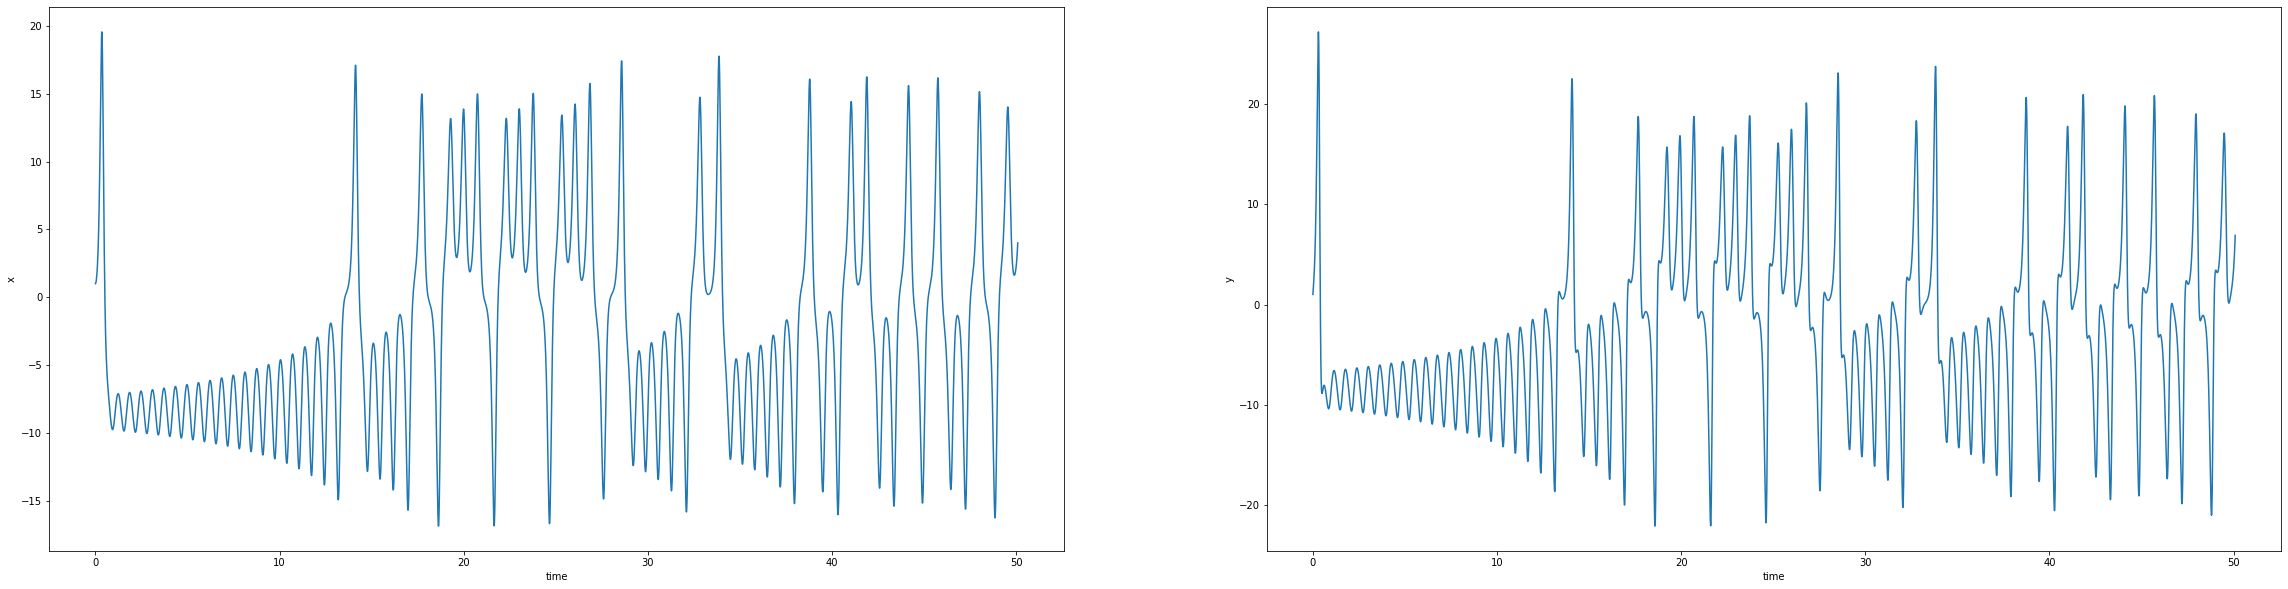

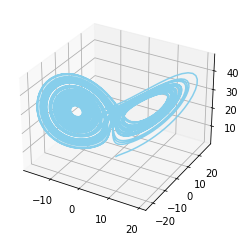

In [22]:
fig, axs = plt.subplots(ncols=2, figsize=(40,10))
dfig = plt.figure()
ax = dfig.add_subplot(111, projection = '3d')
ax.plot(lorenz_df_x1y1['x'], lorenz_df_x1y1['y'], lorenz_df_x1y1['z'], c='skyblue')
sns.lineplot(data=lorenz_df_x1y1, x="time", y="x", ax=axs[0])
sns.lineplot(data=lorenz_df_x1y1, x="time", y="y", ax=axs[1])

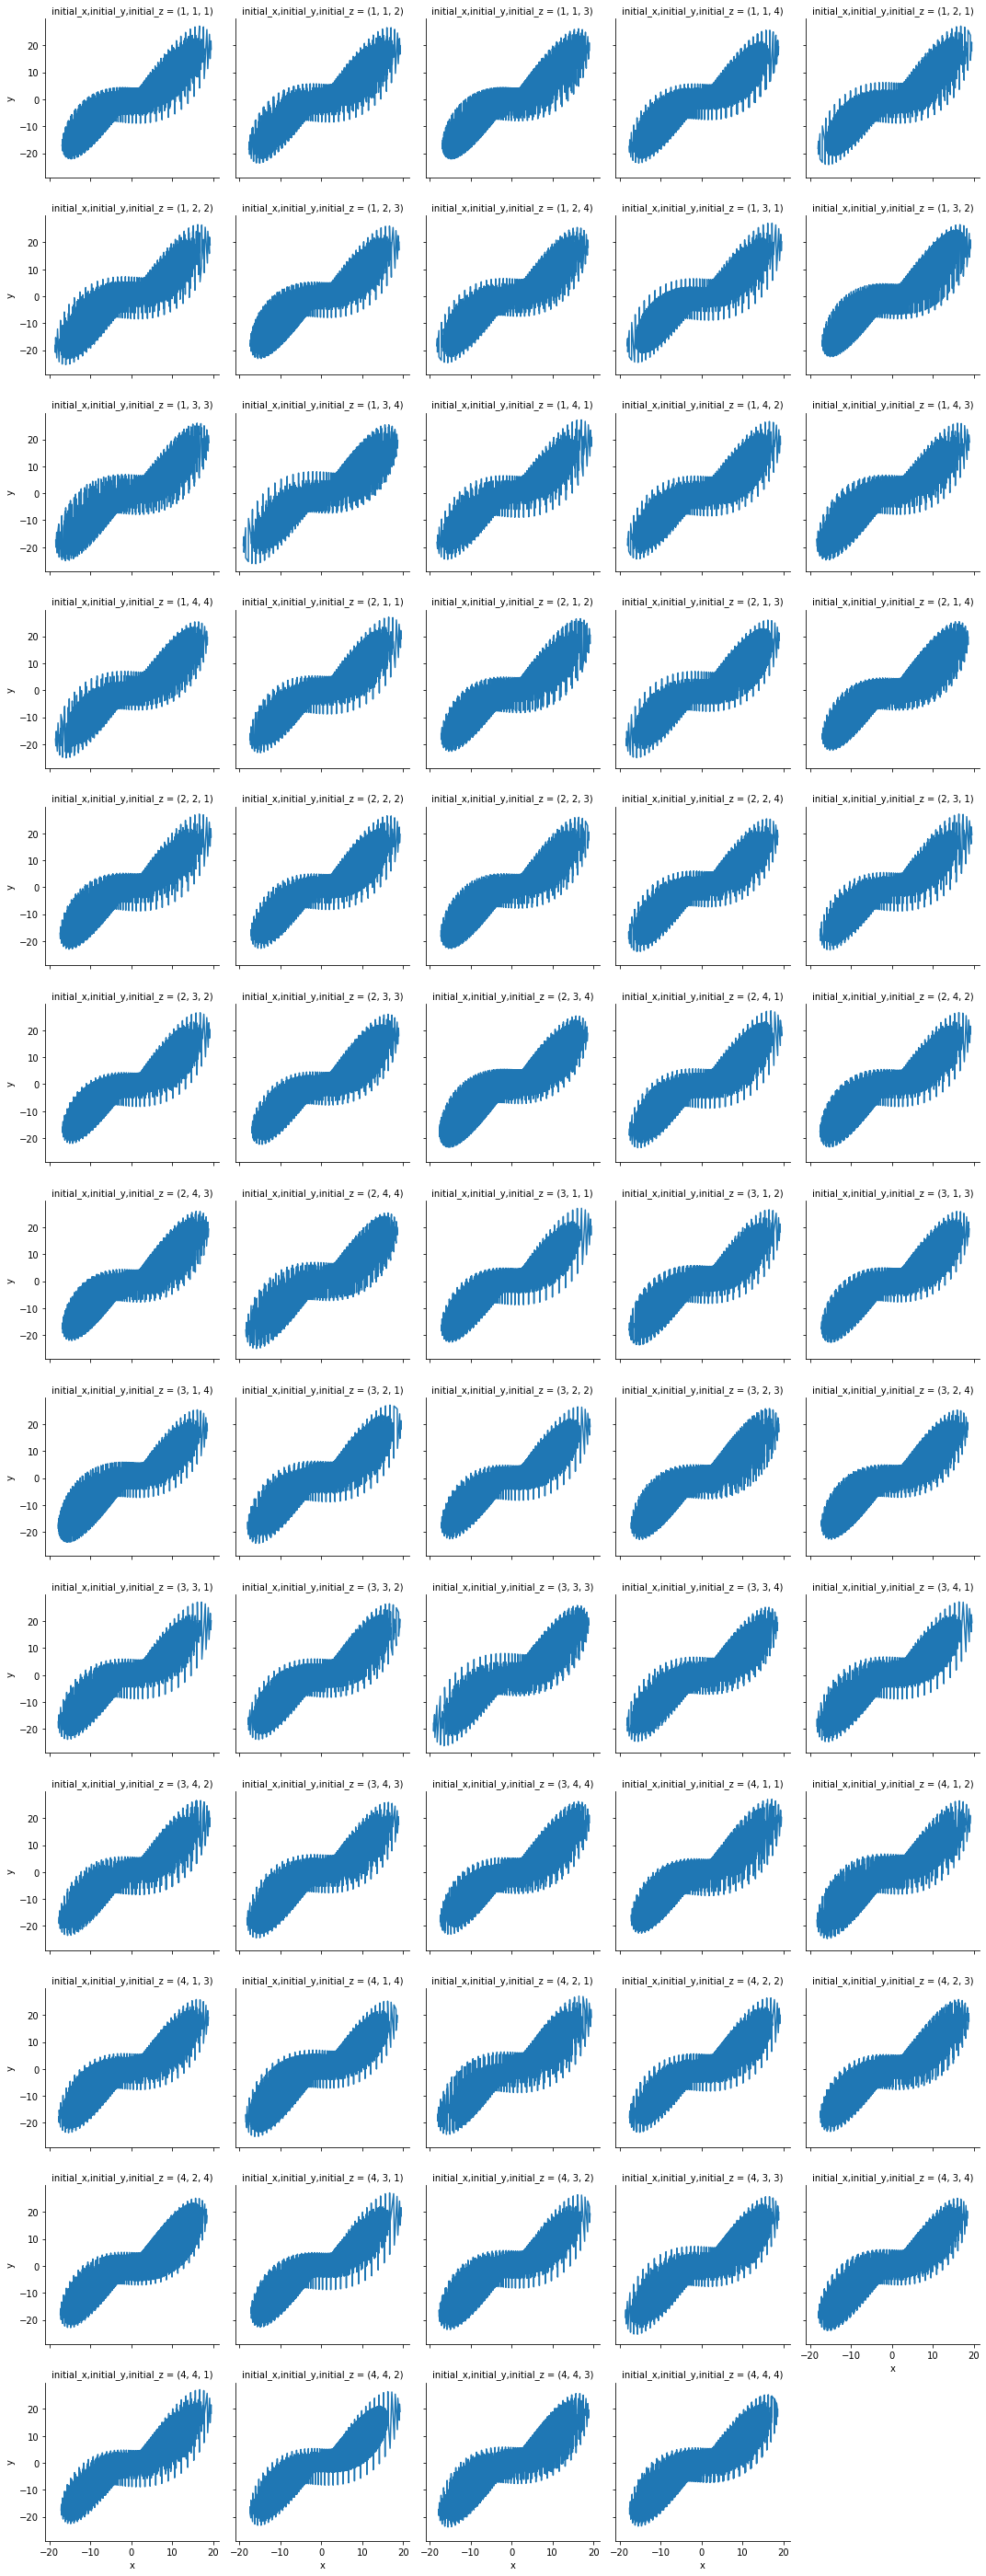

In [99]:
g = sns.FacetGrid(lorenz_df, col="initial_x,initial_y,initial_z", col_wrap=5,)
g.map(sns.lineplot, "x", "y", ci=None)

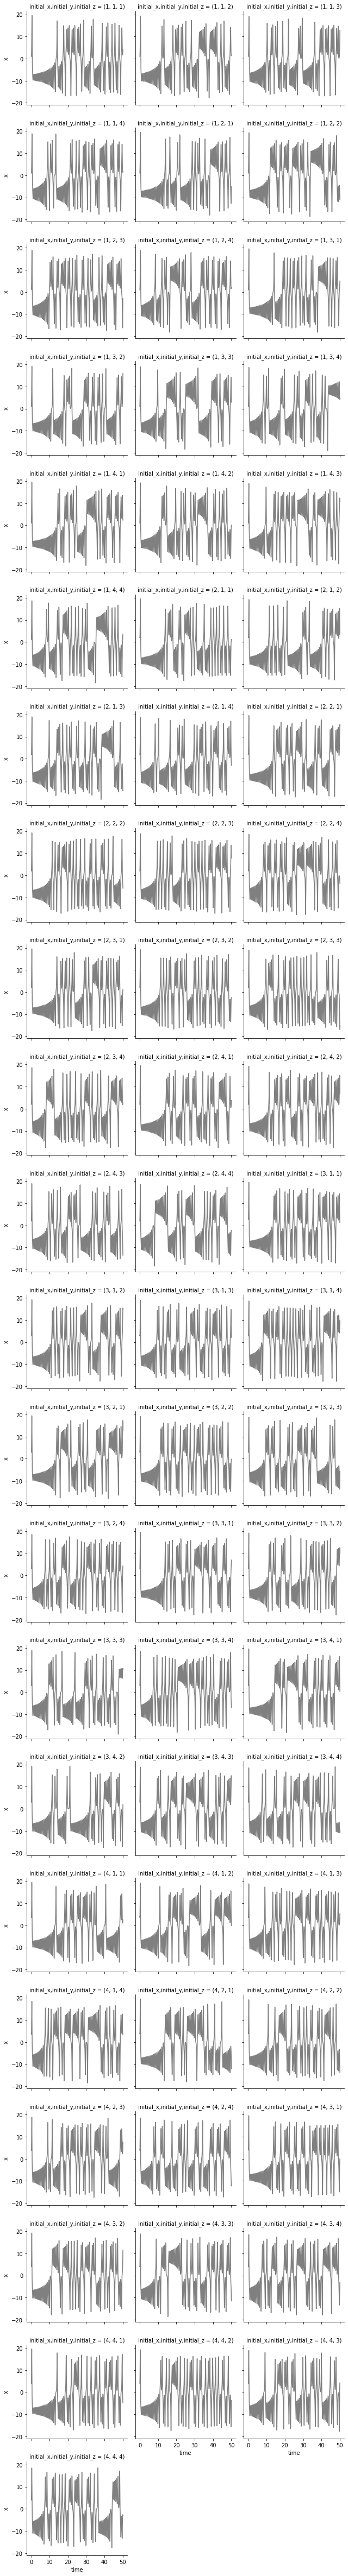

In [25]:
g = sns.FacetGrid(lorenz_df, col="initial_x,initial_y,initial_z", col_wrap=3,)
g.map(sns.lineplot, "time", "x", color=".5", ci=None)

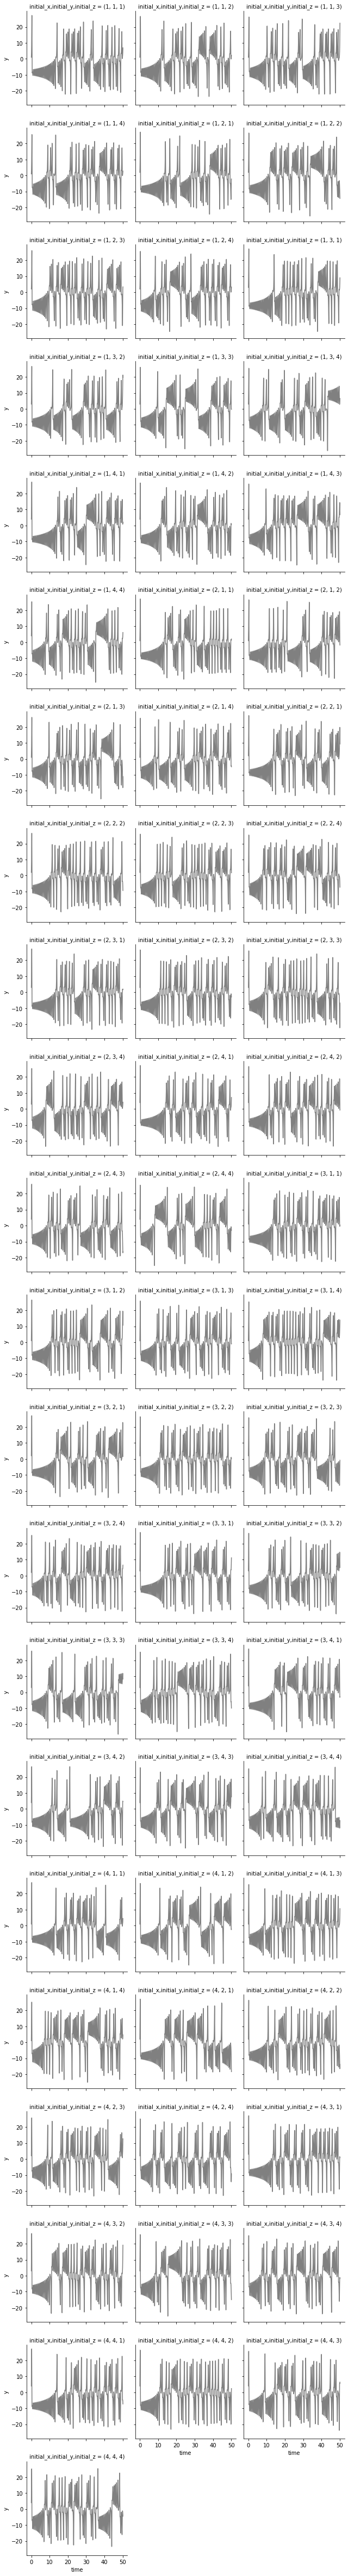

In [26]:
g = sns.FacetGrid(lorenz_df, col="initial_x,initial_y,initial_z", col_wrap=3,)
g.map(sns.lineplot, "time", "y", color=".5", ci=None)

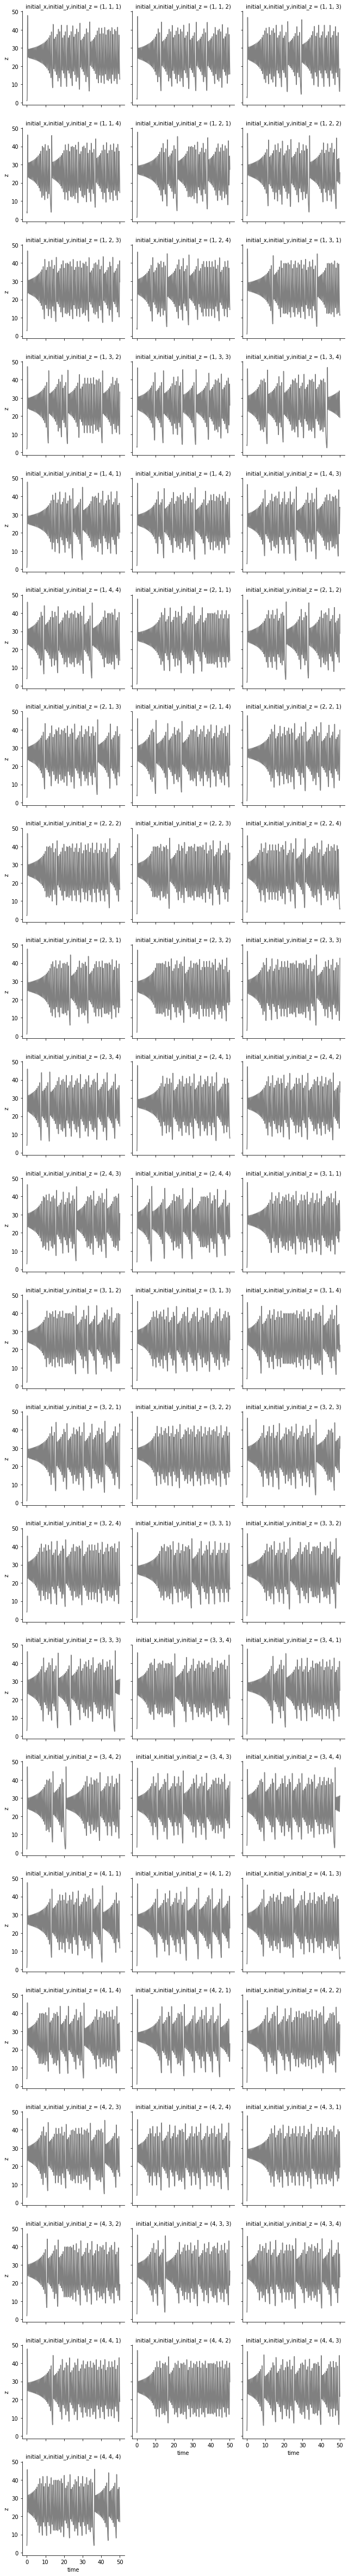

In [27]:
g = sns.FacetGrid(lorenz_df, col="initial_x,initial_y,initial_z", col_wrap=3,)
g.map(sns.lineplot, "time", "z", color=".5", ci=None)

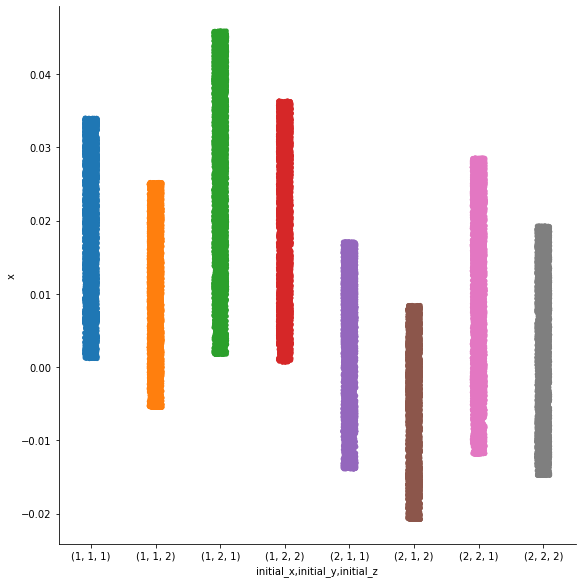

In [28]:
sns.catplot(height=8, data=lorenz_df_preds, x="initial_x,initial_y,initial_z", y="x")

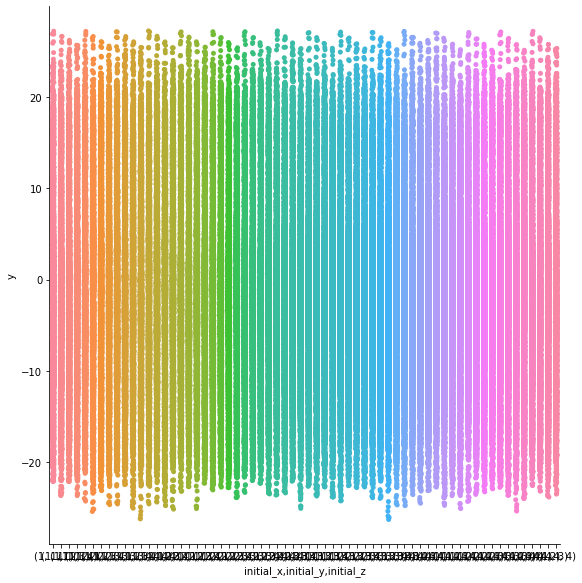

In [29]:
sns.catplot(height=8, data=lorenz_df, x="initial_x,initial_y,initial_z", y="y")

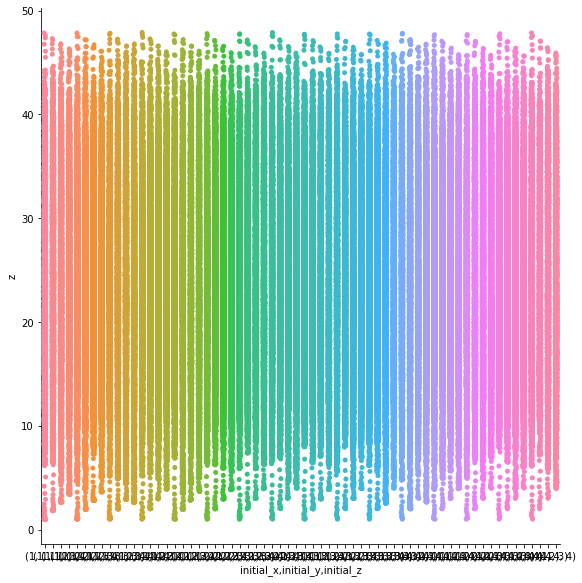

In [30]:
sns.catplot(height=8, data=lorenz_df, x="initial_x,initial_y,initial_z", y="z")

This is looking at the predictions made by the neural network

<AxesSubplot:xlabel='time', ylabel='y'>

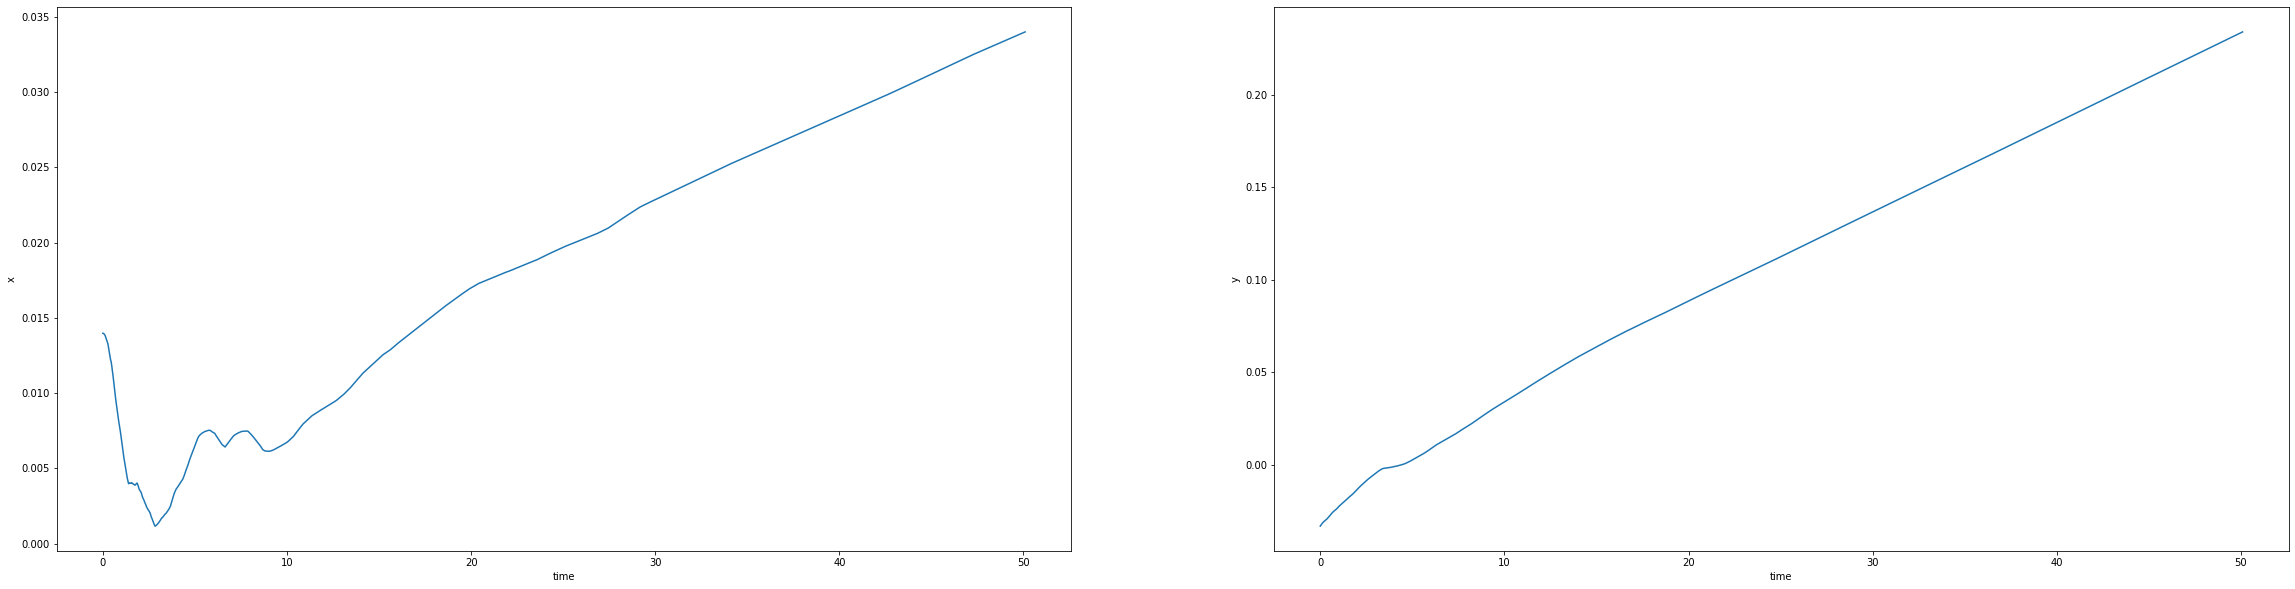

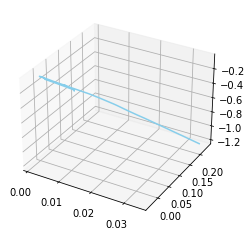

In [31]:
fig, axs = plt.subplots(ncols=2, figsize=(40,10))
dfig = plt.figure()
ax = dfig.add_subplot(111, projection = '3d')
ax.plot(lorenz_df_preds_x1y1['x'], lorenz_df_preds_x1y1['y'], lorenz_df_preds_x1y1['z'], c='skyblue')
sns.lineplot(data=lorenz_df_preds_x1y1, x="time", y="x", ax=axs[0])
sns.lineplot(data=lorenz_df_preds_x1y1, x="time", y="y", ax=axs[1])

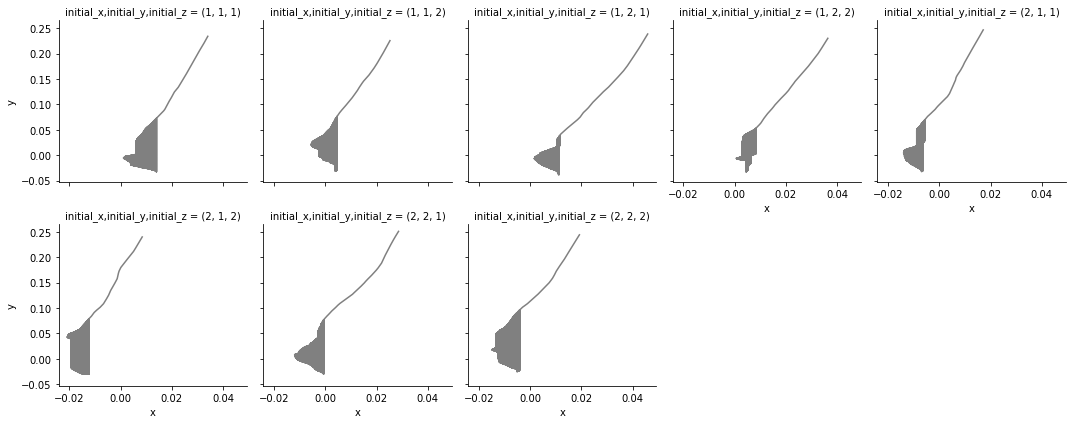

In [32]:
g = sns.FacetGrid(lorenz_df_preds, col="initial_x,initial_y,initial_z", col_wrap=5,)
g.map(sns.lineplot, "x", "y", color=".5", ci=None)

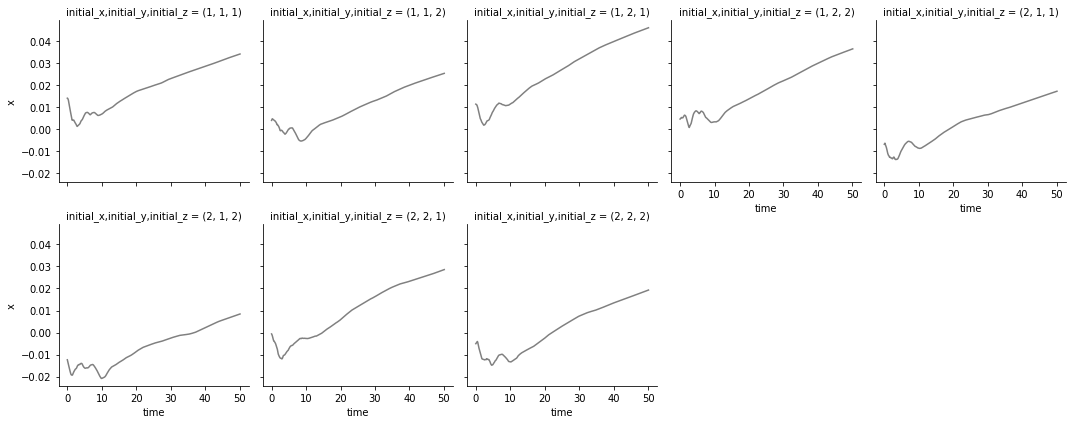

In [33]:
g = sns.FacetGrid(lorenz_df_preds, col="initial_x,initial_y,initial_z", col_wrap=5,)
g.map(sns.lineplot, "time", "x", color=".5", ci=None)

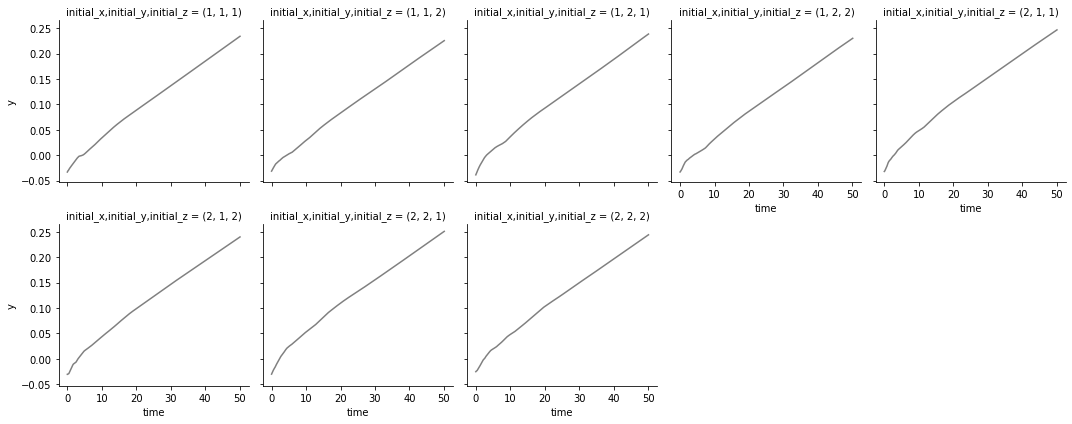

In [35]:
g = sns.FacetGrid(lorenz_df_preds, col="initial_x,initial_y,initial_z", col_wrap=5,)
g.map(sns.lineplot, "time", "y", color=".5", ci=None)

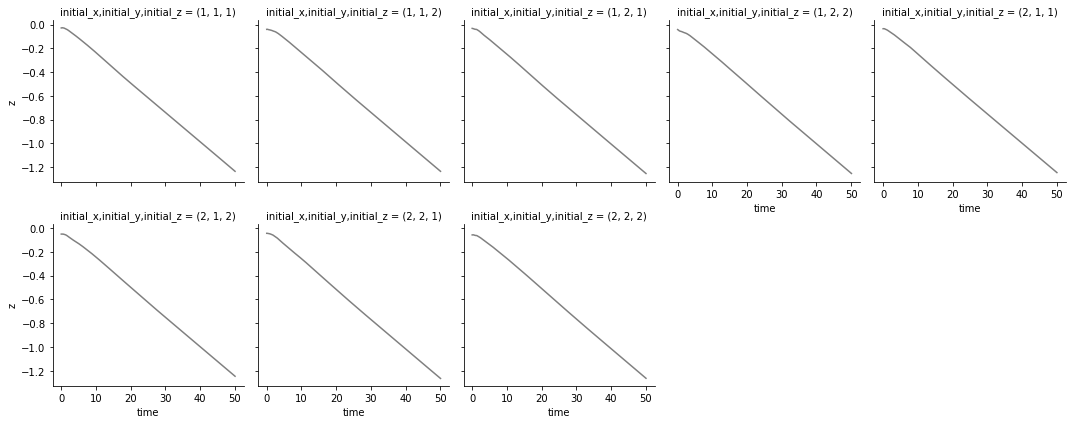

In [36]:
g = sns.FacetGrid(lorenz_df_preds, col="initial_x,initial_y,initial_z", col_wrap=5,)
g.map(sns.lineplot, "time", "z", color=".5", ci=None)

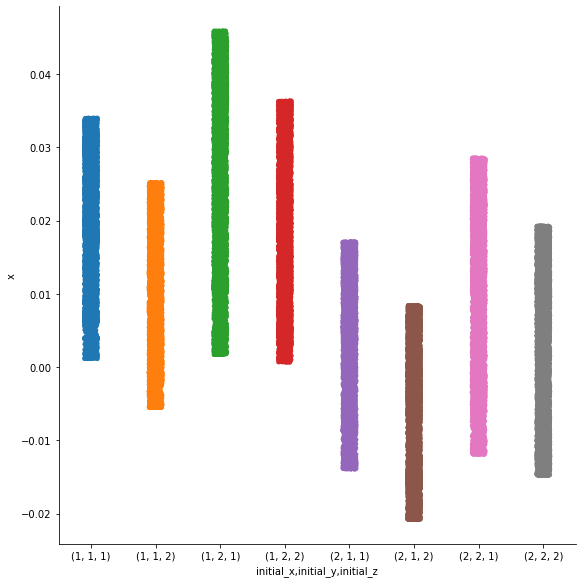

In [37]:
sns.catplot(height=8, data=lorenz_df_preds, x="initial_x,initial_y,initial_z", y="x")

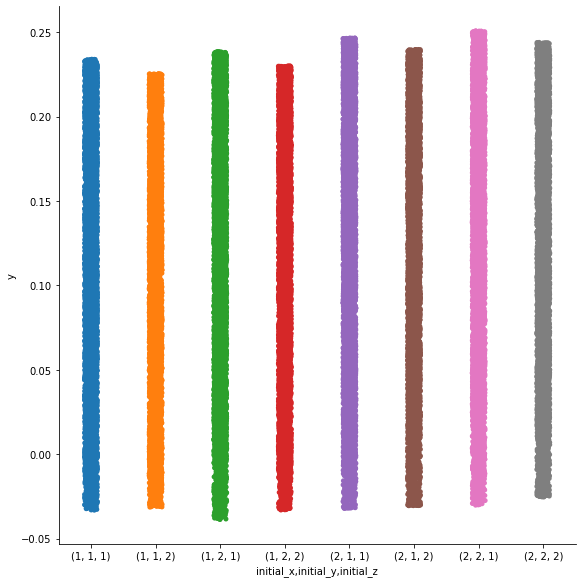

In [38]:
sns.catplot(height=8, data=lorenz_df_preds, x="initial_x,initial_y,initial_z", y="y")

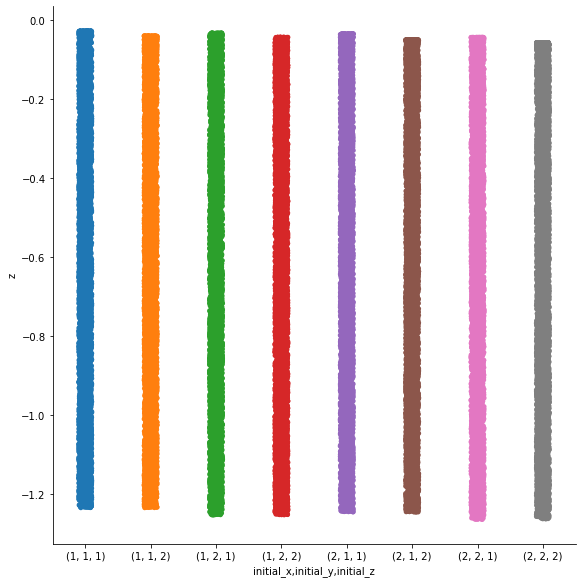

In [39]:
sns.catplot(height=8, data=lorenz_df_preds, x="initial_x,initial_y,initial_z", y="z")

## Combing data

This is combining the predictions made by the neural network with the actual simulations

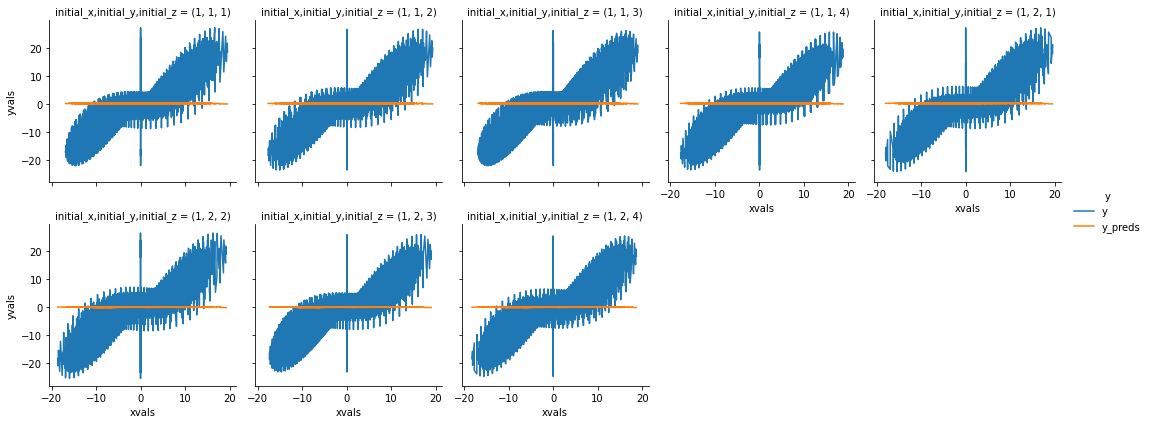

In [79]:
g = sns.FacetGrid(lorenz_df_compare_melt, col="initial_x,initial_y,initial_z", hue="y", col_wrap=5,)
g.map(sns.lineplot, "xvals", "yvals", ci=None)
g.add_legend()

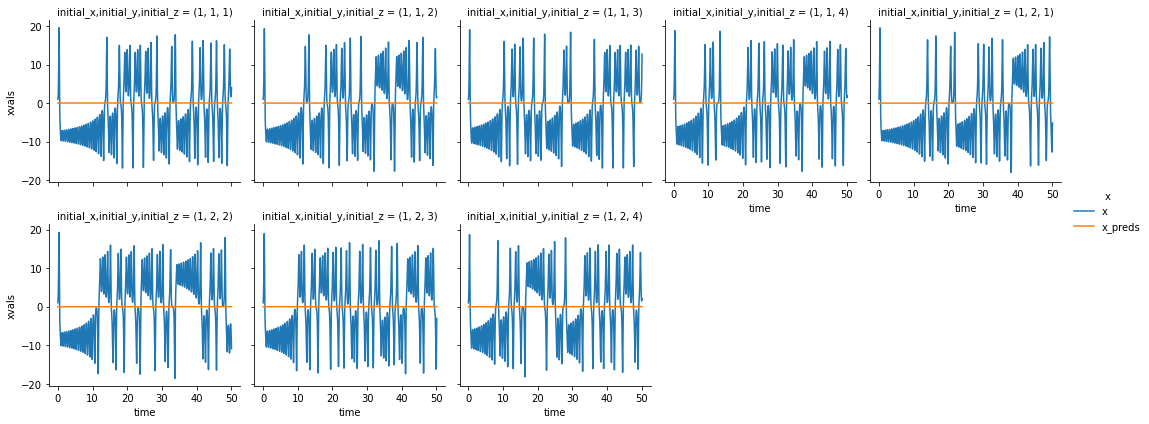

In [50]:
g = sns.FacetGrid(hue("x"), col="initial_x,initial_y,initial_z", hue="x", col_wrap=5,)
g.map(sns.lineplot, "time", "xvals", ci=None)
g.add_legend()

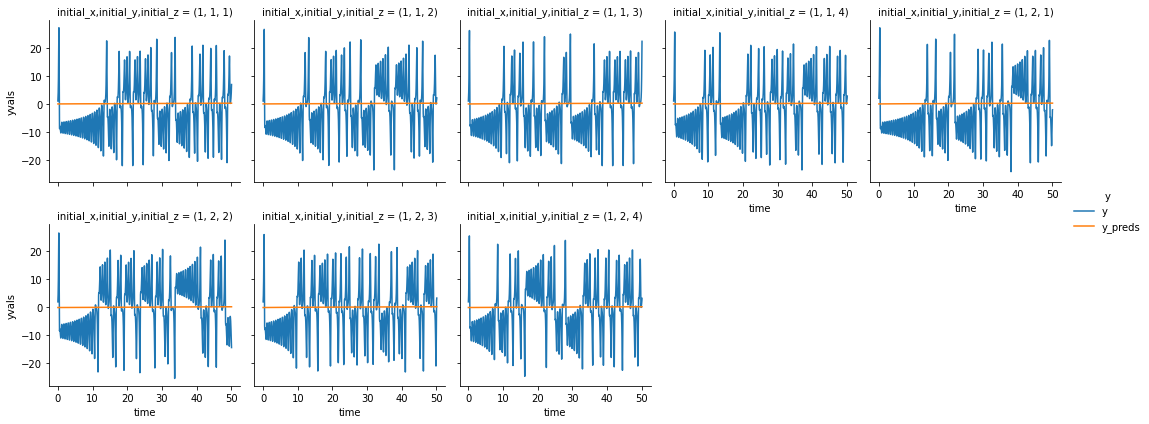

In [51]:
g = sns.FacetGrid(hue("y"), col="initial_x,initial_y,initial_z", hue="y", col_wrap=5,)
g.map(sns.lineplot, "time", "yvals", ci=None)
g.add_legend()

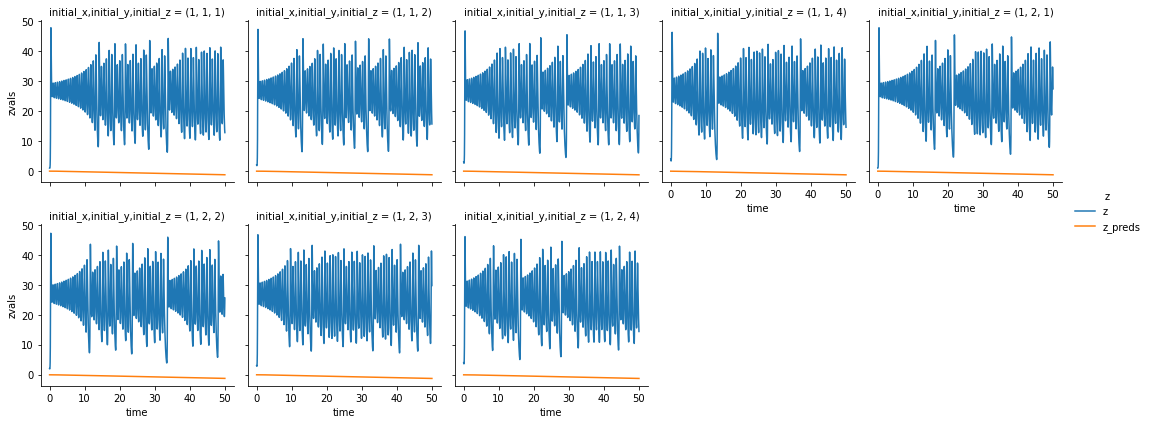

In [52]:
g = sns.FacetGrid(hue("z"), col="initial_x,initial_y,initial_z", hue="z", col_wrap=5,)
g.map(sns.lineplot, "time", "zvals", ci=None)
g.add_legend()

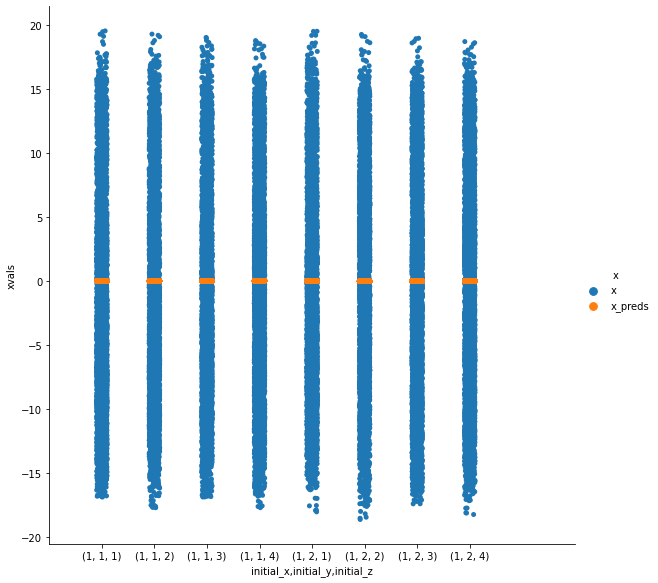

In [55]:
sns.catplot(height=8, data=hue("x"), x="initial_x,initial_y,initial_z", y="xvals", hue="x").set(xlim=(-1,9))

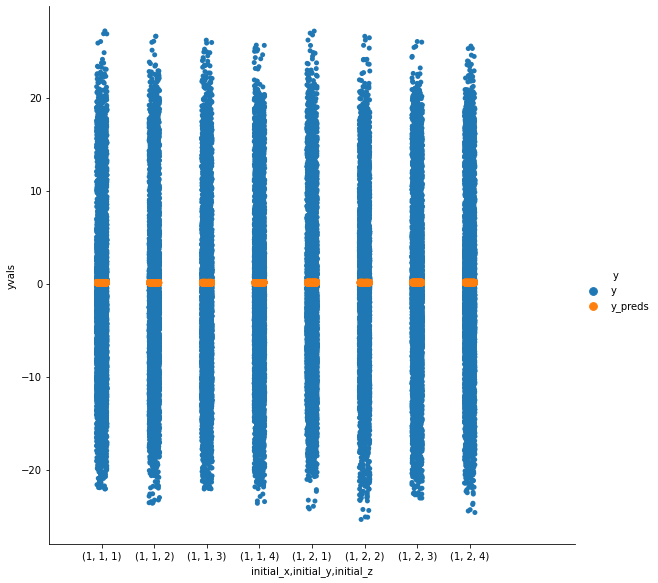

In [53]:
sns.catplot(height=8, data=hue("y"), x="initial_x,initial_y,initial_z", y="yvals", hue="y").set(xlim=(-1,9))

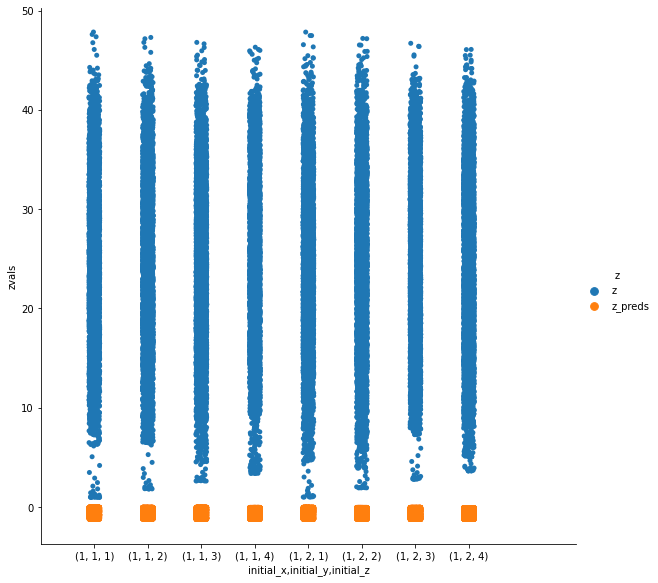

In [54]:
sns.catplot(height=8, data=hue("z"), x="initial_x,initial_y,initial_z", y="zvals", hue="z").set(xlim=(-1,9))